In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [2]:
#import dataset
df_load = pd.read_csv(
    'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco_final.csv')

In [3]:
# Tampilkan bentuk dari dataset
print(df_load.shape)

(6950, 13)


In [4]:
# Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

6950


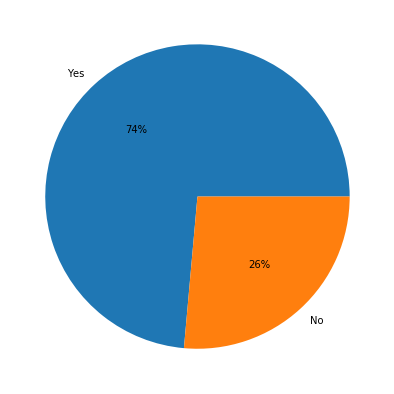

In [6]:
fig = plt.figure(figsize=(10, 7))
data = df_load.Churn.value_counts()
label = ['Yes', 'No']
plt.pie(data, labels=label, autopct='%.0f%%')
plt.show()

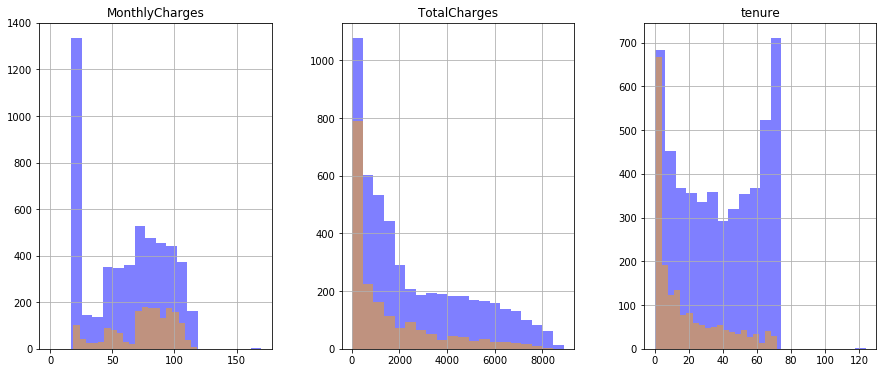

In [8]:
x1 = df_load['tenure'].values.tolist()

# creating bin in chart

numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

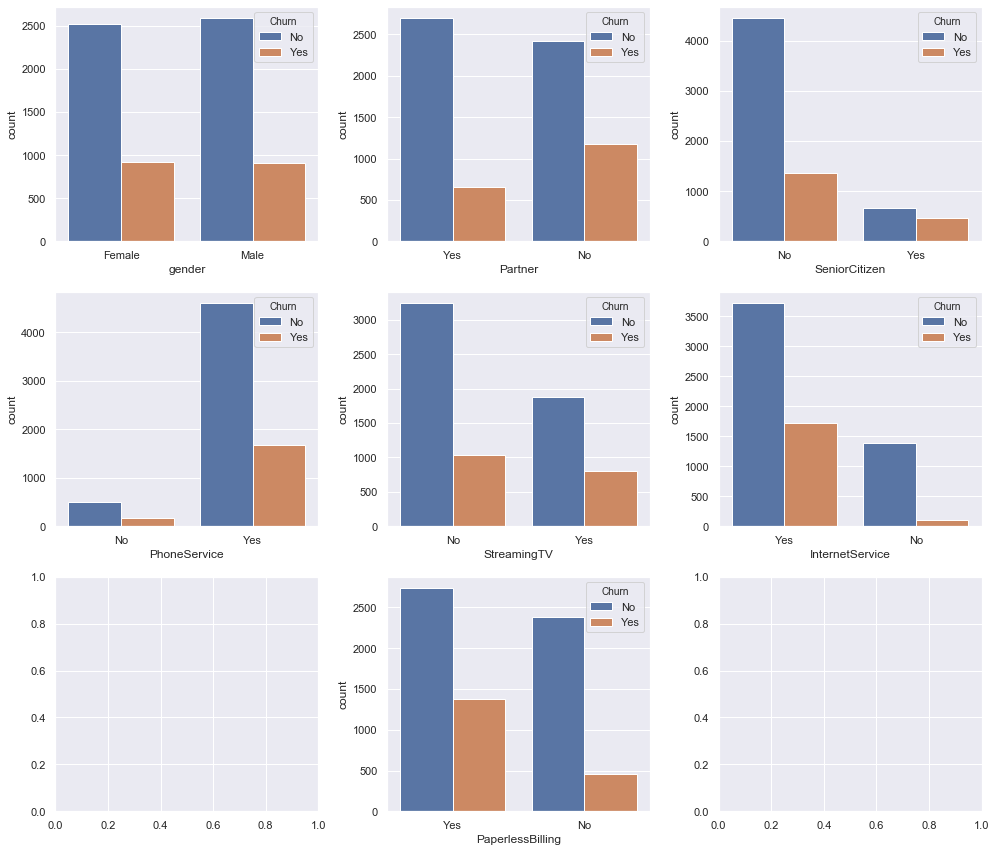

In [9]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()


In [10]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)

# Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
# Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [11]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,
      ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,
      ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


C:\Users\Rengga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.65      0.48      0.55      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.69      0.71      4865
weighted avg       0.78      0.79      0.78      4865



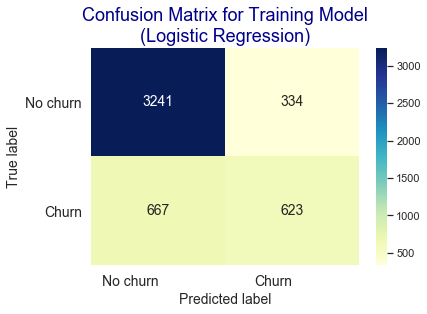

In [21]:
# Predict with LogisticRegression
log_model = LogisticRegression(random_state=42).fit(X, y)
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))


# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(
    y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={
                      'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)',
          fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



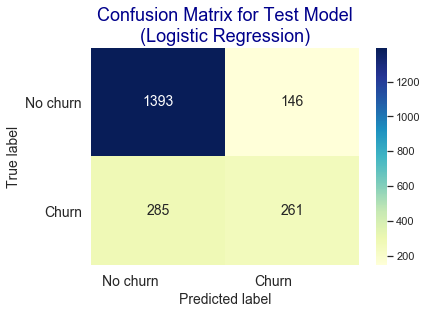

In [22]:
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

confusion_matrix_df = pd.DataFrame((confusion_matrix(
    y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={
                      'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)',
          fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       0.99      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



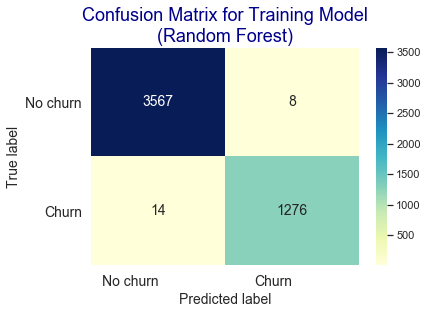

In [17]:
#  with RandomForestClassifier

rdf_model = RandomForestClassifier().fit(x_train, y_train)
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))


# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(
    y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={
                      'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)',
          fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.61      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.72      0.68      0.70      2085
weighted avg       0.77      0.78      0.77      2085



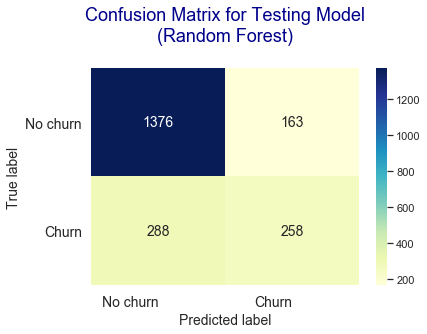

In [18]:
# Predict RandomForestClassifier
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(
    y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={
                      'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n',
          fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



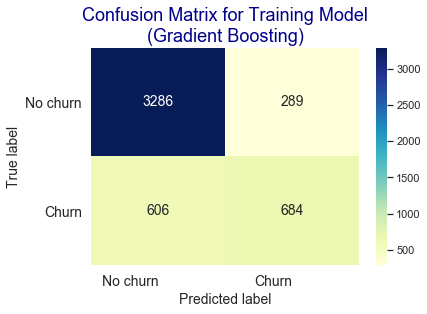

In [23]:
# Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)


# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))


# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(
    y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={
                      'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)',
          fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



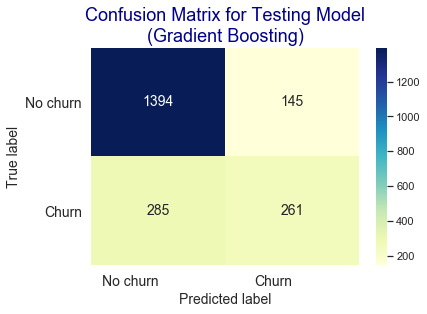

In [20]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))


# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(
    y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={
                      'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)',
          fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()
